In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('cab_rides100.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   distance          100 non-null    float64
 1   cab_type          100 non-null    object 
 2   name              100 non-null    object 
 3   time_stamp        100 non-null    float64
 4   destination       100 non-null    object 
 5   source            100 non-null    object 
 6   price             89 non-null     float64
 7   surge_multiplier  100 non-null    int64  
 8   id                100 non-null    object 
 9   product_id        100 non-null    object 
dtypes: float64(3), int64(1), object(6)
memory usage: 7.9+ KB


In [4]:
data

,distance,cab_type,name,time_stamp,destination,source,price,surge_multiplier,id,product_id
0,2.49,Uber,Taxi,1.543440e+12,Back Bay,South Station,NaN,1,42dd31b8-d488-4de6-8dd1-544d6f943149,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a
1,2.49,Uber,Black SUV,1.543320e+12,Back Bay,South Station,32.5,1,c1463da2-43e9-4e83-a52f-eb4fbe9d85e6,6d318bcc-22a3-4af6-bddd-b409bfce1546
2,2.49,Uber,UberPool,1.543860e+12,Back Bay,South Station,11.0,1,e5face72-4e1e-499e-89db-6a136e11f7f5,997acbb5-e102-41e1-b155-9df7de0a73f2
3,3.07,Uber,Black,1.543660e+12,North Station,Fenway,27.0,1,08a28a48-eec5-43f8-b81d-bc2f57fc7f9a,6c84fd89-3f11-4782-9b50-97c468b19529
4,3.07,Uber,UberX,1.543460e+12,North Station,Fenway,12.0,1,1f384d44-39fa-4537-b6a9-e97c0420fc48,55c66225-fbe7-4fd5-9072-eab1ece5e23e
...,...,...,...,...,...,...,...,...,...,...
95,1.81,Uber,UberXL,1.543440e+12,Theatre District,North End,15.0,1,5ad26487-dbb2-472c-a141-30d59ddb9b72,6f72dfc5-27f1-42e8-84db-ccc7a75f6969
96,1.81,Uber,Taxi,1.543460e+12,Theatre District,North End,NaN,1,6c2dec25-7912-4ca1-a0fa-99c148cef8a3,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a
97,1.30,Uber,Black SUV,1.543880e+12,Theatre District,South Station,27.0,1,7eae79ec-6a4a-4a36-9eb4-1e95860493d1,6d318bcc-22a3-4af6-bddd-b409bfce1546
98,1.81,Uber,Black,1.543710e+12,Theatre District,North End,19.5,1,8b37f02d-9406-4980-b1bd-5a17ecf08985,6c84fd89-3f11-4782-9b50-97c468b19529


In [5]:
data['name']=data['name'].astype('string')
data['source']=data['source'].astype('string')
data['destination']=data['destination'].astype('string')

In [6]:
data['cab_type'].value_counts()
#data['name'].value_counts()

Uber    66
Lyft    34
Name: cab_type, dtype: int64

In [7]:
data['price'].fillna(data['price'].mean(),inplace=True)

In [8]:
data.isnull().any()

distance            False
cab_type            False
name                False
time_stamp          False
destination         False
source              False
price               False
surge_multiplier    False
id                  False
product_id          False
dtype: bool

In [9]:
data.drop(['time_stamp','product_id','id'],inplace=True,axis=1)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   distance          100 non-null    float64
 1   cab_type          100 non-null    object 
 2   name              100 non-null    string 
 3   destination       100 non-null    string 
 4   source            100 non-null    string 
 5   price             100 non-null    float64
 6   surge_multiplier  100 non-null    int64  
dtypes: float64(2), int64(1), object(1), string(3)
memory usage: 5.6+ KB


In [11]:
x=data.iloc[:,0:5].values
x

array([[2.49, 'Uber', 'Taxi', 'Back Bay', 'South Station'],
       [2.49, 'Uber', 'Black SUV', 'Back Bay', 'South Station'],
       [2.49, 'Uber', 'UberPool', 'Back Bay', 'South Station'],
       [3.07, 'Uber', 'Black', 'North Station', 'Fenway'],
       [3.07, 'Uber', 'UberX', 'North Station', 'Fenway'],
       [3.07, 'Uber', 'UberXL', 'North Station', 'Fenway'],
       [3.07, 'Uber', 'Taxi', 'North Station', 'Fenway'],
       [3.07, 'Uber', 'WAV', 'North Station', 'Fenway'],
       [3.07, 'Uber', 'UberPool', 'North Station', 'Fenway'],
       [3.07, 'Uber', 'Black SUV', 'North Station', 'Fenway'],
       [1.57, 'Uber', 'WAV', 'North End', 'Theatre District'],
       [1.57, 'Uber', 'Taxi', 'North End', 'Theatre District'],
       [1.57, 'Uber', 'UberXL', 'North End', 'Theatre District'],
       [1.57, 'Uber', 'UberPool', 'North End', 'Theatre District'],
       [1.57, 'Uber', 'Black SUV', 'North End', 'Theatre District'],
       [1.57, 'Uber', 'Black', 'North End', 'Theatre District']

In [12]:
y=data.iloc[:,5:6].values
y

array([[16.73595506],
       [32.5       ],
       [11.        ],
       [27.        ],
       [12.        ],
       [18.5       ],
       [16.73595506],
       [12.        ],
       [ 8.5       ],
       [35.        ],
       [ 8.        ],
       [16.73595506],
       [13.        ],
       [ 8.        ],
       [27.        ],
       [17.        ],
       [ 8.        ],
       [13.5       ],
       [23.5       ],
       [14.        ],
       [34.        ],
       [26.5       ],
       [14.        ],
       [16.73595506],
       [26.5       ],
       [12.        ],
       [11.        ],
       [19.5       ],
       [12.        ],
       [38.5       ],
       [16.73595506],
       [23.        ],
       [30.5       ],
       [10.5       ],
       [10.5       ],
       [16.73595506],
       [17.5       ],
       [10.        ],
       [22.5       ],
       [ 7.        ],
       [13.5       ],
       [16.5       ],
       [27.5       ],
       [ 9.        ],
       [ 9.        ],
       [30

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
lb=LabelEncoder()

In [15]:
x[:,1]=lb.fit_transform(x[:,1])

In [16]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [17]:
ct=ColumnTransformer([("on",OneHotEncoder(),[-1])],remainder='passthrough')

In [18]:
ct

ColumnTransformer(n_jobs=None, remainder='passthrough', sparse_threshold=0.3,
                  transformer_weights=None,
                  transformers=[('on',
                                 OneHotEncoder(categories='auto', drop=None,
                                               dtype=<class 'numpy.float64'>,
                                               handle_unknown='error',
                                               sparse=True),
                                 [2])],
                  verbose=False)

In [20]:
x=ct.fit_transform(x)


ValueError: For a sparse output, all columns should be a numeric or convertible to a numeric.

In [20]:
x=x[:,1:]

In [26]:
ct=ColumnTransformer([("on",OneHotEncoder(),[-1])],remainder='passthrough')
x=ct.fit_transform(x)
x
x=x[:,1:]

array([[0.0, 0.0, 0.0, ..., 0.0, 2.49, 1],
       [0.0, 1.0, 0.0, ..., 0.0, 2.49, 1],
       [0.0, 0.0, 0.0, ..., 0.0, 2.49, 1],
       ...,
       [0.0, 1.0, 0.0, ..., 0.0, 1.3, 1],
       [1.0, 0.0, 0.0, ..., 0.0, 1.81, 1],
       [1.0, 0.0, 0.0, ..., 0.0, 1.3, 1]], dtype=object)

In [ ]:
ct=ColumnTransformer([("on",OneHotEncoder(),[-1])],remainder='passthrough')
x=ct.fit_transform(x)
x

In [27]:
x=x[:,1:]

In [28]:
x.shape

(100, 29)

In [29]:
data['source'].value_counts()

North End             17
Fenway                14
West End              14
Theatre District      13
Back Bay              12
North Station         11
South Station          7
Financial District     6
Beacon Hill            6
Name: source, dtype: Int64

In [30]:
data['name'].value_counts()

Taxi            11
Black           10
Black SUV       10
UberPool         9
UberXL           9
WAV              9
UberX            8
Lux Black XL     6
Lux              6
Lyft XL          6
Lux Black        6
Shared           5
Lyft             5
Name: name, dtype: Int64

In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [32]:
from sklearn.linear_model import LinearRegression
mlr=LinearRegression()

In [33]:
mlr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
x

array([[0.0, 0.0, 0.0, ..., 0.0, 2.49, 1],
       [1.0, 0.0, 0.0, ..., 0.0, 2.49, 1],
       [0.0, 0.0, 0.0, ..., 0.0, 2.49, 1],
       ...,
       [1.0, 0.0, 0.0, ..., 0.0, 1.3, 1],
       [0.0, 0.0, 0.0, ..., 0.0, 1.81, 1],
       [0.0, 0.0, 0.0, ..., 0.0, 1.3, 1]], dtype=object)

In [35]:
y_pred=mlr.predict(x_test)
y_pred

array([[12.25533155],
       [16.72169034],
       [ 9.83010299],
       [13.90996472],
       [12.60234899],
       [31.12781386],
       [ 6.32404313],
       [ 5.5159396 ],
       [ 7.13878235],
       [16.58016209],
       [ 7.54751487],
       [12.39408079],
       [25.60234899],
       [ 5.9153106 ],
       [13.14371566],
       [19.02651392],
       [13.08815803],
       [25.07360993],
       [ 9.7548247 ],
       [11.63525603]])

In [36]:
y_test

array([[11.        ],
       [16.73595506],
       [11.        ],
       [16.73595506],
       [13.5       ],
       [29.5       ],
       [ 8.        ],
       [ 7.        ],
       [ 8.5       ],
       [15.        ],
       [ 9.5       ],
       [16.73595506],
       [27.5       ],
       [ 8.        ],
       [12.        ],
       [16.73595506],
       [14.        ],
       [26.5       ],
       [10.5       ],
       [ 8.5       ]])

In [37]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9120784208367919

In [36]:
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
lr =DecisionTreeRegressor(random_state=0)

#training model in training set
lr.fit(x_train, y_train)

# making predection using the test set
y_pred = lr.predict(x_test)
y_pred


array([10.        , 16.73595506,  9.5       , 16.73595506, 13.5       ,
       27.        , 11.        ,  7.        ,  9.5       , 14.        ,
       11.        , 17.5       , 27.5       ,  9.5       , 10.5       ,
       16.73595506, 12.        , 27.        , 12.        , 11.        ])

In [39]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9518882338636767

In [40]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [41]:
from sklearn.tree import DecisionTreeRegressor
dt= DecisionTreeRegressor(criterion='mse',random_state=0)
dt.fit(x_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [42]:
y_pred=dt.predict(x_test)
y_pred

array([10.        , 16.73595506,  9.5       , 16.73595506, 13.5       ,
       27.        , 11.        ,  7.        ,  9.5       , 14.        ,
       11.        , 17.5       , 27.5       ,  9.5       , 10.5       ,
       16.73595506, 12.        , 27.        , 12.        , 11.        ])

In [43]:
from sklearn.metrics import r2_score #Accuracy ~89%
r2_score(y_test,y_pred)

0.9518882338636767

In [44]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=100,random_state=0)
rf.fit(x_train,y_train)

C:\Users\AKASH\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [45]:
y_pred=rf.predict(x_test)

In [46]:
from sklearn.metrics import r2_score # Accuracy~93% 
r2_score(y_test,y_pred)

0.8803990189009568

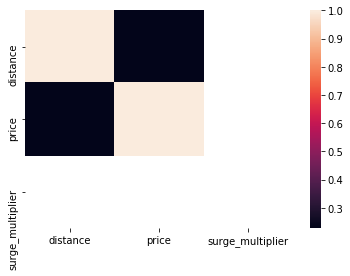

In [47]:
import seaborn as sb
heat_map = sb.heatmap(data.corr())
#data.corr()

array([2.49, 1, 'UberPool', 'Back Bay', 'South Station'], dtype=object)